In [1]:
# This notebook is for playing with fixed density/pressure/temperature models.

In [2]:
# This cell sets the working directory so that the code will work on the cloud as well.

import os
cur_dir = os.getcwd()
if cur_dir.split('/')[-1] == "test":
    os.chdir('./..')

In [3]:
import numpy as np
import random
from matplotlib               import pyplot as plt
from matplotlib.pyplot        import figure, legend

import lib.temperature as temperature
import lib.mc_density  as mc_density
import lib.mc_interior as mc_interior
import lib.allona      as allona
import lib.constants   as constants
import lib.profile     as profile

In [9]:
def load_pm_format_csv(filename):
    # load raw data
    aa = [x.strip("\n").split(',') for x in open(filename).readlines()][1:]
    raw = [[float(x) for x in y] for y in aa]
    
    # create input arrays.
    radius = np.array(list(reversed([x[0] for x in raw])))
    rho = np.array(list(reversed([x[1] for x in raw])))
    temp = np.array(list(reversed([x[3] for x in raw])))
    pressure = np.array(list(reversed([x[2] for x in raw])))

    # density model
    model = mc_density.MCDensity(radius, rho)
    
    # test:
    print ("mass of model is %s"%model.get_mass())
    
    catalog = temperature.iron_sio2_water_H_catalog()
    composition = []
    for r,t,p  in zip(rho, temp, pressure):
    composition.append(catalog.get_composition(t,r,p*0.9))
    

In [5]:
radius = np.array(list(reversed([x[6] for x in raw])))
rho = np.array(list(reversed([x[4] for x in raw])))
temp = np.array(list(reversed([x[3] for x in raw])))
pressure = np.array(list(reversed([x[1]*1e10 for x in raw])))

In [7]:
model.get_mass()

8.667915590007997e+28

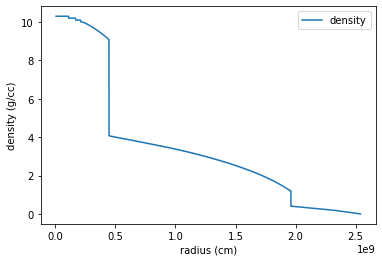

In [8]:
pressure = model.get_pressure()
model.plot_densities()

[PYFLYBY] from matplotlib.pyplot import plot


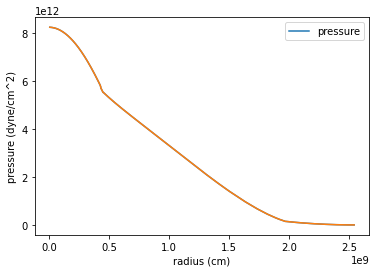

In [9]:
model.plot_pressure()
plot(model._radii, pressure)

In [10]:
catalog = temperature.iron_sio2_water_H_catalog()
composition = []
for r,t,p  in zip(rho, temp, pressure):
    composition.append(catalog.get_composition(t,r,p*0.9))

In [19]:
#composition

In [12]:

mix = np.array([catalog.composition_to_mix(x) for x in composition])
#for 

In [13]:
planet = mc_interior.MCInterior(radius, rho, mix, catalog)
m_profile = profile.TemperatureProfile(catalog, planet)

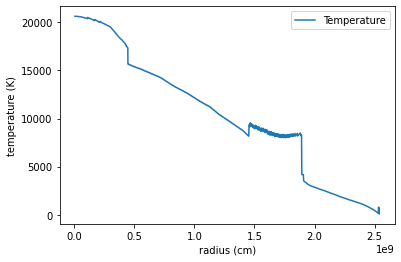

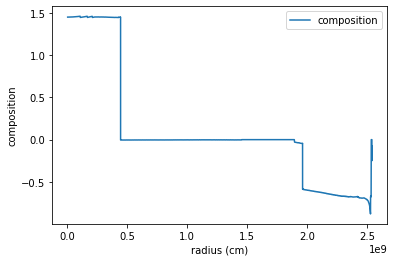

In [14]:
planet.plot_temp()
figure()
planet.plot_composition()

In [15]:
#m_profile.plot_temperature_profile()

In [16]:
pressure = planet.get_pressure()
dd = planet._densities

In [17]:
dd[0], pressure[0], catalog.mix_to_composition(planet._mix[0])

(10.3, 8260760902106.12, 1.4492864461670847)

In [18]:
catalog.get_temp(1.0, dd[0], pressure[0])